## Week_12_Knights_tour

### Knight's Tour

&nbsp;

Knight's tour is about a knight who tries to travel through all vertices on the chessboard and each vertex is visited only once. Rules of knight's tour can be found in the following link

https://en.wikipedia.org/wiki/Knight%27s_tour

&nbsp;

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as pltani
import os
os.chdir('C:\Dev\Jupyter Notebook\Math_Discrete\Week 12')

#graph adt
#check the below link for more details
# https://github.com/je-suis-tm/graph-theory/blob/master/graph.py
import graph

In [3]:
#dfs here is slightly different from other dfs
#an organic dfs goes very deep until we cannot find any unvisited children vertices
#in that case we move up to the parent vertex to find unvisited sibling vertices
#this action violates the rule of travel-once
#hence we use a few more lines to adjust the algorithm
#when we havent finished visiting all the vertices
#any backtracking leads to cancellation of the visited status of the current vertex
#becuz this is not the solution we want
#we cant visit one vertex twice
#we keep doing cancellation
#until we find a path that dives very deep and never comes back
#in the end, this path would ve visited all the vertices only once
#it would be the answer we are looking for
#details of organic dfs can be found in the following link
# https://github.com/je-suis-tm/graph-theory/blob/master/BFS%20dfs%20on%20DCG.ipynb
def dfs(ADT,start,path):

    ADT.visit(start)

    path.append(start)

    for newpos in ADT.edge(start):

        if ADT.go(newpos)==0:

            dfs(ADT,newpos,path)

    if len(path)<ADT.order():

        ADT.clear(start)

        path.pop()

In [4]:
#create graph adt
#the movement of knight is very special
#for each vertex, there are eight possible next moves at maximum
#we also need a semi definite constraint to make sure knight doesnt travel outta chessboard
def check_around(ADT,i,j,size):

    for x,y in [(i-2,j+1),(i-2,j-1),(i-1,j-2),
                (i-1,j+2),(i+1,j-2),(i+1,j+2),
                (i+2,j-1),(i+2,j+1)]:

        if x<size and x>=0 and y<size and y>=0:

            ADT.append((i,j),(x,y),1)
            
    return ADT

In [5]:
#viz knight s tour
def draw_chessboard(ind,*args):
    
    ax,path,knight=args
    
    #vertices the knight travelled
    for i in range(ind):
        ax.scatter(path[i][0]+0.5,path[i][1]+0.5,
                    color='red',marker='x',s=200)
    
    #knight s current position
    knight.set_offsets((path[ind][0]+0.5,path[ind][1]+0.5))   

In [6]:
#assume this is an 8 by 8 chessboard
size=8

#generate graph adt
chessboard=graph.graph()
for i in range(size):
    for j in range(size):
        chessboard=check_around(chessboard,i,j,size)

In [7]:
#dfs
#plz note that there are many possible solutions
#this is not the only answer
path=[]
dfs(chessboard,(0,0),path)

MovieWriter ffmpeg unavailable; using Pillow instead.


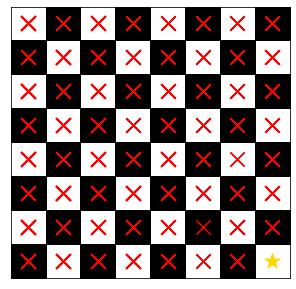

In [8]:
fig,ax=plt.subplots(figsize=(5,5))

#create black and white chessboard
for i in range(size):
    for j in range(size):
        if (i%2==0 and j%2==0) or (i%2!=0 and j%2!=0):
            ax.fill_between([i,i+1],j,j+1,color='black')

#knight s trajectory
knight=ax.scatter(path[0][0]+0.5,path[0][1]+0.5,
                    color='gold',marker='*',s=250)
    
#chic design
ax.set_xlim(0,size)
ax.set_ylim(0,size)
ax.set_xticks([])
ax.set_yticks([])

#create animations
anim=pltani.FuncAnimation(fig,draw_chessboard,
                          frames=size*size,
                          interval=700,
                          fargs=(ax,path,knight))
anim.save('knights tour.gif')

![alt text](./preview/knights tour.gif)